# Intro

In [245]:
#Read in libraries
import pandas as pd
import swifter

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [246]:
#Set style for matplotlib
plt.style.use('ggplot')

In [247]:
#Set options for pandas
pd.options.display.max_columns =1_000

pd.set_option('display.max_rows', 1_000)


In [248]:
#Set path to listings data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed'

#Set list of date columns to parse
dates = ['calendar_last_scraped', 'first_review', 'host_since', 'last_review']

#Read in file
listings = pd.read_csv(path + '/01_16_2020_Listings_Post_EDA.csv',index_col=0, parse_dates=dates)

## Preview Data

In [249]:
listings.head(1)

,accommodates,amenities,availability_30,availability_365,bathrooms,bed_type,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,calendar_last_scraped,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,is_location_exact,last_review,latitude,longitude,market,maximum_maximum_nights,name,neighborhood_overview,neighbourhood_cleansed,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,scrape_id,security_deposit,space,summary,transit,zipcode,weekly_price,monthly_price
0,3,TV Cable TV Internet Wifi Kitchen Pets liv...,0,77,1.0,Real Bed,1.0,2.0,1,0.0,0.0,2019-04-03,1 week ago,moderate,San Francisco,100.0,New update: the house next door is under const...,25.0,2009-07-23,2,We are a family with 2 boys born in 2009 and 2...,1169,True,True,1.0,"San Francisco, California, United States",Holly,Duboce Triangle,100.0,within an hour,2008-07-31,email phone facebook reviews kba,* No Pets - even visiting guests for a short t...,958,True,True,2019-03-16,37.76931,-122.43386,San Francisco,30.0,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,183,51.0,170.0,Apartment,False,False,True,10.0,10.0,10.0,10.0,10.0,97.0,10.0,1.55,Entire home/apt,2.019040e+13,100.0,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,94117.0,1120.0,4200.0


In [250]:
#Print Shape
print('Listings shape: ', listings.shape)

#Check data types
listings.dtypes

Listings shape:  (88771, 68)


accommodates                                 int64
amenities                                   object
availability_30                              int64
availability_365                             int64
bathrooms                                  float64
bed_type                                    object
bedrooms                                   float64
beds                                       float64
chlc                                         int64
chlc_private_rooms                         float64
chlc_shared_rooms                          float64
calendar_last_scraped               datetime64[ns]
calendar_updated                            object
cancellation_policy                         object
city                                        object
cleaning_fee                               float64
description                                 object
extra_people                               float64
first_review                        datetime64[ns]
guests_included                

# Removing irrelevant features

In [251]:
#Removing columns that do not pertain to price
to_drop = ['calendar_last_scraped','calendar_updated', 'description','first_review','host_about','host_id',
          'host_listings_count','host_location','host_name', 'host_neighbourhood','house_rules','host_since','name',
          'neighborhood_overview', 'scrape_id','weekly_price','monthly_price', 'id','last_review',
           'longitude', 'latitude','space', 'summary', 'transit']

#Remove to_drop cols
listings.drop(columns=to_drop, inplace = True)
print('Current shape of listings: ', listings.shape)

Current shape of listings:  (88771, 44)


# Update Data Types

In [252]:
#Ordinal variables to convert to category
ordinals = ['review_scores_accuracy', 'review_scores_checkin','review_scores_cleanliness', 
            'review_scores_communication','review_scores_location','review_scores_rating',
            'review_scores_value']

#Numerics that are categorical variables
objects = ['zipcode']

#Convert 
listings[ordinals] = listings[ordinals].astype('category')
listings[objects] = listings[objects].astype('object')

# Missing Values

In [277]:
#Create missing dataframe and store counts of na's per col in listings
missing = pd.DataFrame(listings.isna().sum())

#Rename count
missing.rename(columns = {0:'Missing_Values'},inplace = True)

#Calculate % of missing values
missing['%_Missing'] = (missing['Missing_Values']/len(listings)) * 100

#Capture data type of each column
missing['Data_Types'] = pd.Series(listings.dtypes)

#Keep rows where Missing_Values > 0 and sort
missing = missing[missing['Missing_Values'] > 0]
missing.sort_values(by = 'Missing_Values', ascending = False, inplace = True)

## Resolving missing values by data type

### Float64

In [287]:
#Index floats from listings
listings_floats = listings.select_dtypes('float64')

#Get a list of float64s from missing to caputre stats from listings to assign to 
#missing to decide strategy on dealing with missing values

#Get cols with missing values we want to resolve
floats = floats[cols]

#Outlier detection
cols = floats.index.tolist()

def get_stats(df,columns):
    for col in df[columns]:
        mean = df[col].mean()
        return mean

    
floats['mean'] = floats.apply(get_stats(listings, cols))


TypeError: ("'numpy.float64' object is not callable", 'occurred at index Missing_Values')

### Objects

### Category

Since we know that on average, the vast majority of reviews are relatively positive, we will populate review scores with the mode

In [214]:
#get a list of the category variables from missing
cats = list(missing[missing['Data_Types'] == 'category'].index)


In [215]:
#Iterates each column in cats and replaces each column's NA's with the column's mode
for column in listings[cats]:
    listings[column].fillna(listings[column].mode()[0], inplace = True)
    
listings[cats]

,review_scores_value,review_scores_location,review_scores_checkin,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,review_scores_rating
0,10.0,10.0,10.0,10.0,10.0,10.0,97.0
1,9.0,10.0,10.0,10.0,10.0,10.0,98.0
2,8.0,9.0,9.0,8.0,8.0,9.0,85.0
3,9.0,9.0,10.0,9.0,9.0,10.0,93.0
5,9.0,9.0,10.0,9.0,8.0,10.0,90.0
...,...,...,...,...,...,...,...
98790,10.0,10.0,10.0,10.0,10.0,10.0,100.0
98791,10.0,10.0,10.0,10.0,10.0,10.0,100.0
98792,10.0,10.0,10.0,10.0,10.0,10.0,100.0
98794,10.0,10.0,10.0,10.0,10.0,10.0,100.0


# Feature Engineering

## Transform numeric columns

C:\Users\kishe\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


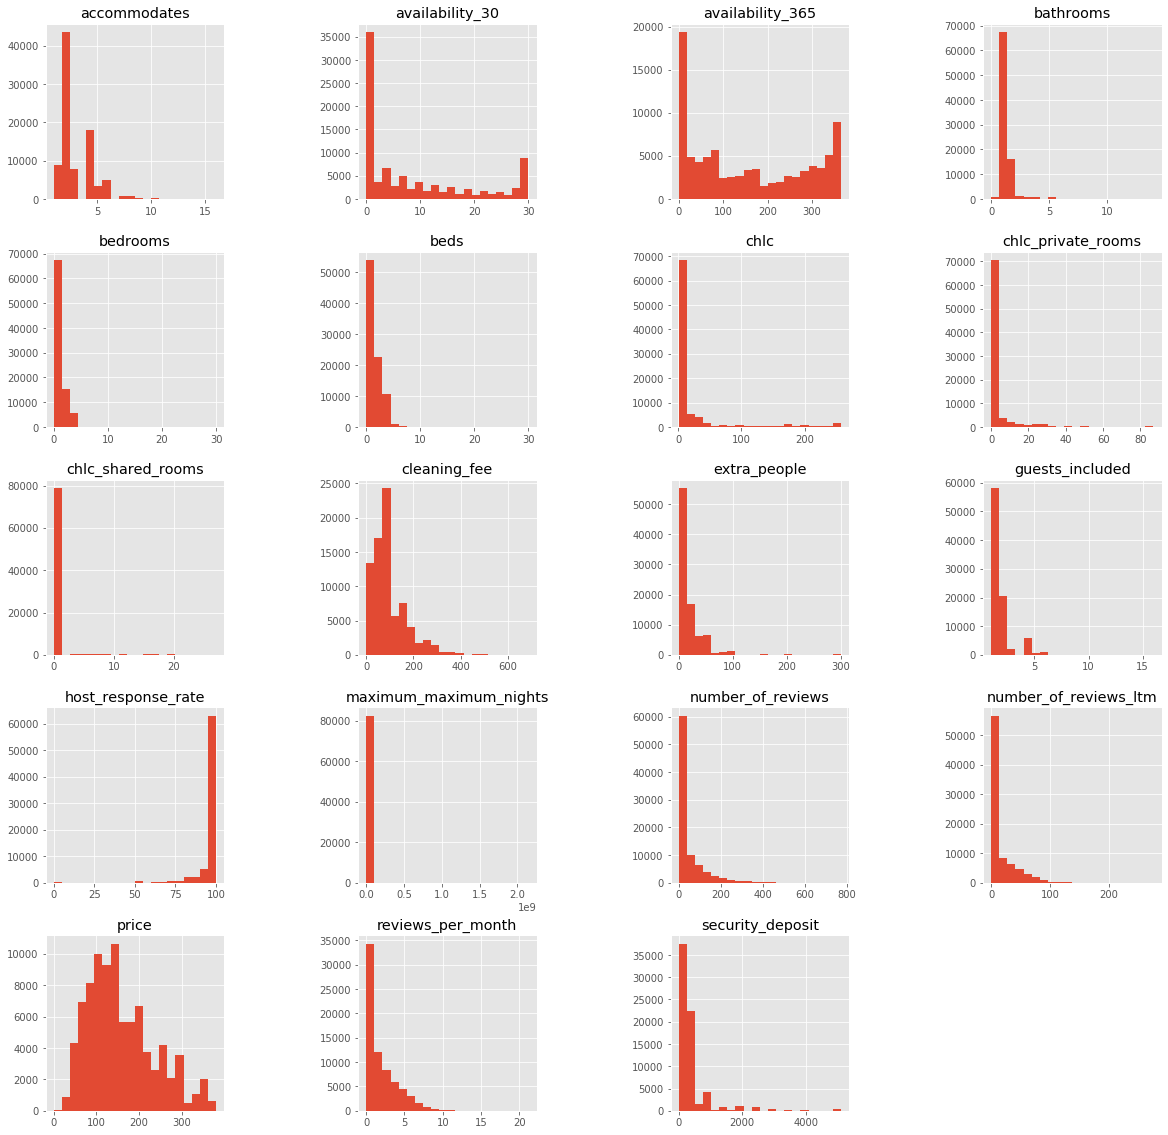

In [65]:
#Subset data to visualize distributions of numeric variables
numerics = listings.select_dtypes(exclude=['category','bool','object','datetime64'])

fig, ax = plt.subplots(figsize = (20,20))
numerics.hist(ax = ax, bins = 20)
fig.subplots_adjust(wspace=.75);
#chlc stands for calculated host listings count

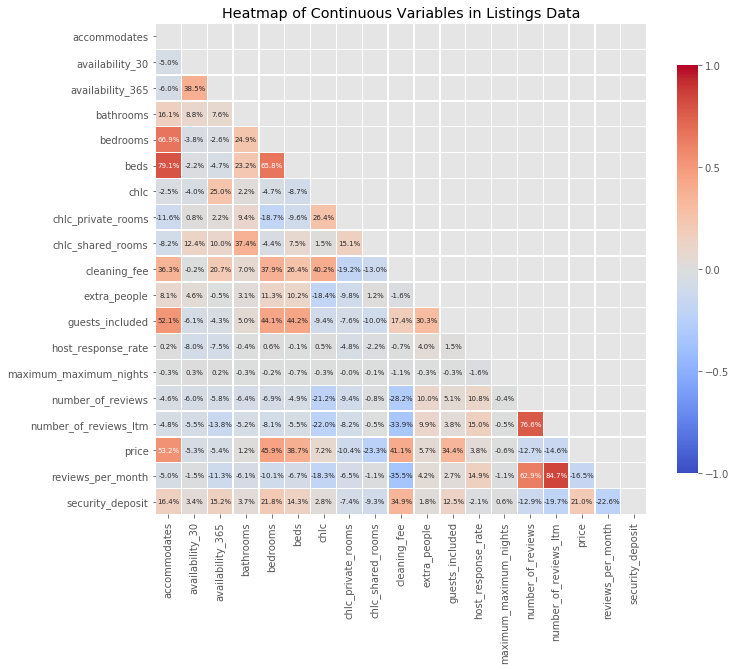

In [66]:
#Create heatmap of numeric data
corr = numerics.corr()

#Setup mask to hide upper triangle of heatmap
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .35,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .5, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 7},
                      fmt='.1%')

#add the column names as labels
ax.set_title('Heatmap of Continuous Variables in Listings Data');

## Adding new features

In [67]:
#Convert amenities into a count of amenities offered by airbnb
listings['total_amenities']= listings['amenities'].str.count(' ') + 1

#Check
listings[['total_amenities', 'amenities']].head(5)

,total_amenities,amenities
0,75,TV Cable TV Internet Wifi Kitchen Pets liv...
1,42,Internet Wifi Kitchen Heating Family/kid fri...
2,57,TV Internet Wifi Kitchen Free street parking...
3,50,TV Internet Wifi Kitchen Free street parking...
5,99,TV Cable TV Internet Wifi Kitchen Free par...


Split amenities and host_verifications and turn into categorical variables

In [68]:
#Split amenities, host_verifications and encode as dummy variables
temp1 = listings['amenities'].str.get_dummies(sep=' ')
temp2 = listings['host_verifications'].str.get_dummies(sep=' ')

temp = pd.concat([temp1, temp2], axis=1)

#Remove column headers shorter than 3 characters in length
for col in temp.columns: 
    if len(col) < 3:
        temp.drop(columns= col, inplace=True)

#Combine listings and temp
listings = pd.concat([listings, temp], axis=1)

#Drop amenities column
listings.drop(columns = ['amenities','host_verifications'], inplace = True)

#View Shape
print('Shape of data frame: ', listings.shape)

Shape of data frame:  (88771, 354)


# Encode Dummy Variables

In [69]:
#Subset Boolean values
bools = list(listings.select_dtypes(include=['bool']).columns)

#Convert True and False into ints
listings[bools] = listings[bools].astype(int)

#Convert encode data type object
temp=pd.get_dummies(listings.select_dtypes(include=['int32','object']))

#Combine listings and temp
listings = pd.concat([listings, temp], axis=1)

#Subset original object cols
objects = list(listings.select_dtypes(include=['object']).columns)

#Drop objects
listings.drop(columns= objects, inplace=True)
                      
#View shape of and preview data
print('Shape of data frame: ', listings.shape)
listings.head(3)

Shape of data frame:  (88771, 477)


,accommodates,availability_30,availability_365,bathrooms,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,cleaning_fee,extra_people,guests_included,host_identity_verified,host_is_superhost,host_response_rate,instant_bookable,is_location_exact,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,price,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,security_deposit,total_amenities,24-hour,Accessible-height,Air,Amazon,BBQ,Baby,Babysitter,Balcony,Bath,Bathroom,Bathtub,Beach,Beachfront,Bed,Bedroom,Bidet,Body,Breakfast,Building,Buzzer/wireless,Cable,Carbon,Cat(s),Ceiling,Central,Changing,Children’s,Cleaning,Coffee,Convection,Cooking,Crib,DVD,Day,Disabled,Dishes,Dishwasher,Dog(s),Doorman,Double,Dryer,Echo,Electric,Elevator,Espresso,Essentials,Ethernet,Exercise,Extra,Family/kid,Fax,Fire,Fireplace,Firm,First,Fixed,Flat,Formal,Free,Full,Game,Garden,Gas,Ground,Gym,HBO,Hair,Hammock,Handheld,Hangers,Heat,Heated,Heating,High,High-resolution,Host,Hot,Indoor,Internet,Iron,Jetted,Keypad,Kitchen,Kitchenette,Lake,Laptop,Lock,Lockbox,Long,Luggage,Memory,Microwave,Mini,Mobile,Mountain,Mudroom,Murphy,Netflix,Other,Outdoor,Outlet,Oven,Pack,Paid,Patio,Pets,Pillow-top,Play/travel,Pocket,Pool,Printer,Private,Projector,Rain,Refrigerator,Roll-in,Room-darkening,Safety,Self,Shampoo,Shared,Shower,Single,Ski-in/Ski-out,Smart,Smoke,Smoking,Soaking,Sound,Stair,Stand,Standing,Steam,Step-free,Stove,Suitable,Sun,Table,Tennis,Terrace,Toilet,Walk-in,Warming,Washer,Waterfront,Well-lit,Wheelchair,Wide,Wifi,Window,Wine,access,accessible,aid,air,allowed,alone,and,area,around,backyard,balcony,bars,basics,bath,bathroom,bed,bedroom,before,blankets,books,card,chair,charger,check-in,checkout,clearance,comforts,computer,conditioning,connection,console,cooler,corner,court,covers,crib,detector,dining,dinnerware,door,doorway,drawer,dropoff,dryer,en.hosting_amenity_49,en.hosting_amenity_50,enter,entrance,entryway,equipment,essentials,events,extinguisher,fan,fireplace,floor,floors,foam,for,fridge,friendly,front,gates,grab,greets,grill,guards,guest,guests,gym,hallway,hallways,head,hoist,home,hot,intercom,kettle,kit,kitchen,lamps,level,linens,live,living,lock,loungers,machine,maker,mattress,missing:,monitor,monoxide,off,oven,paper,parking,path,pet(s),pillows,pit,player,pool,premises,profiling,property,purifier,rack,recommendations,room,screen,seating,shades,shower,silverware,soap,space,spot,staff,stairs,stays,steam,steps,street,suite,system,table,term,this,toilet,towel,toys,translation,tub,valet,view,water,wifi,with,workspace,you,None,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,photographer,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,host_identity_verified,host_is_superhost,instant_bookable,is_location_exact,require_guest_phone_verification,require_guest_profile_picture,requires_license,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Brisbane,city_Daly City,city_San Francisco,city_South San Francisco,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,market_D.C.,market_San Francisco,neighbourhood_cleansed_Bayview,neighbourhood_cleansed_Bernal Heights,neighbourhood_cleansed_Castro/Upper Market,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Crocker Amazon,neighbourhood_cleansed_Diamond Heights,neighbourhood_cleansed_Downtown/Civic Center,neighbourhood_cleansed_Excelsior,neighbourhood_cleansed_Financial District,neighbourhood_cleanse

# Split Data into Training and Test Sets

In [70]:
#Prepare data for splitting into train and test sets
X= listings.drop(columns='price').values
y= listings['price'].values

#Check shapes
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (88771, 476)
y shape:  (88771,)


In [71]:
#Import models
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=42)

#Check shapes
print('Training data shape: {}'.format(X_train.shape))
print('Test data shape: {}'.format(X_test.shape))

Training data shape: (66578, 476)
Test data shape: (22193, 476)


# Model Based Feature Selection

In [72]:
#Instantiate Selectore with RandomForestRegressor
select = SelectFromModel(RandomForestRegressor(random_state=42,
                                              n_estimators=100), threshold='median')

#Fit and transform training data
select.fit(X_train, y_train)
X_train_t = select.transform(X_train)

#Check shapes
print('Original training data shape: {}'.format(X_train.shape))
print('Transformed training data shape: {}'.format(X_train_t.shape))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [74]:
listings.isna().sum()

accommodates                                           0
availability_30                                        0
availability_365                                       0
bathrooms                                            216
bedrooms                                              19
beds                                                  93
chlc                                                   0
chlc_private_rooms                                  6381
chlc_shared_rooms                                   6381
cleaning_fee                                        9771
extra_people                                           0
guests_included                                        0
host_identity_verified                                 0
host_is_superhost                                      0
host_response_rate                                 13260
instant_bookable                                       0
is_location_exact                                      0
maximum_maximum_nights         